### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [4]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [191]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [192]:
data.shape 

(3282, 5)

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [194]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


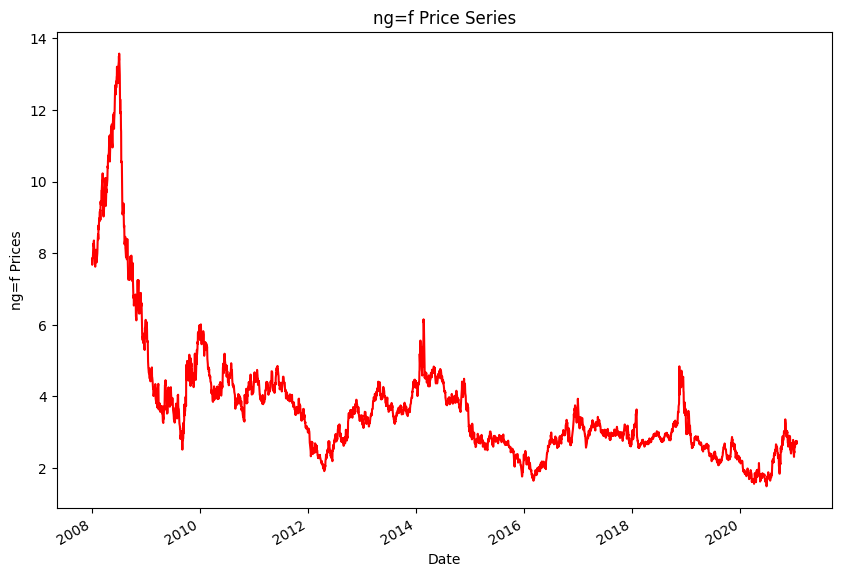

In [195]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

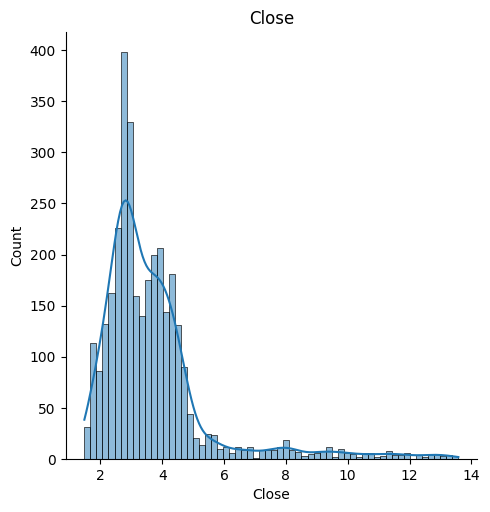

In [196]:
sns.displot(data["Close"],kde=True)
plt.title('Close')
plt.show()

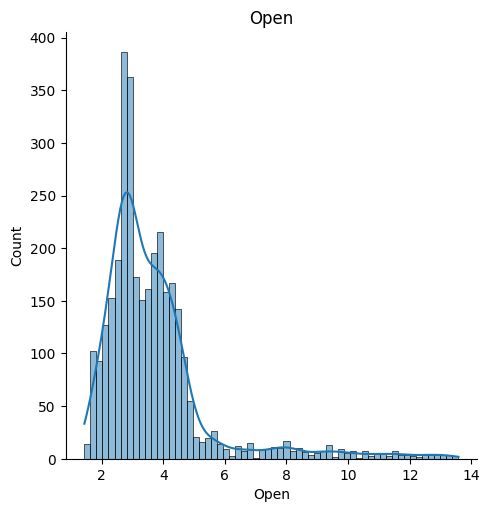

In [197]:
sns.displot(data["Open"], kde=True)
plt.title('Open')
plt.show()

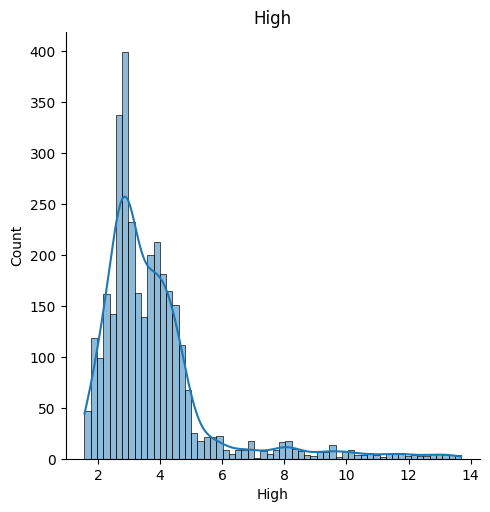

In [198]:
sns.displot(data["High"], kde=True)
plt.title('High')
plt.show()

In [199]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"]

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 
print(X_train)

(2625, 4)
(657, 4)
(2625,)
(657,)
              Open    High     Low  Volume
Date                                      
2017-06-27   3.049   3.060   3.012   48460
2008-05-22  11.710  11.857  11.481  118104
2012-11-12   3.496   3.596   3.470   96809
2012-02-23   2.664   2.695   2.565  110200
2008-02-29   9.421   9.478   9.302   49171
...            ...     ...     ...     ...
2011-04-26   4.377   4.409   4.333   82201
2020-12-21   2.730   2.730   2.632  104274
2014-07-28   3.736   3.850   3.728   52286
2018-05-14   2.825   2.847   2.798  130605
2018-11-08   3.530   3.568   3.493  166771

[2625 rows x 4 columns]


In [200]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)
#print(lr.intercept_, lr.coef_)
#print(lr.score(X_train, y_train))
print(pred1)
print(y_test)

[ 2.80025521  5.71452107  2.67598004  5.96209712  2.11272627 12.78073553
  3.96962911  4.87093937  1.7957296   4.77535218  2.88317702  3.52438236
  2.78074708  2.97823651  4.2320276   2.46605691  4.14343586  4.57617542
  9.00290889  2.93461728  4.41981471  2.6638892   2.54609005  2.35659708
  2.85304719  1.96549634  2.77466247  3.91456824  3.30051883  4.7520832
  4.02003703  2.7084426  11.73817085  4.23592618  4.39406688  3.68320373
  3.52338075  5.32779806  3.6551215   3.42242166  3.96382871  2.42903792
  2.68051977  2.61045398  3.13018683  4.4270207   4.27296423  2.75934544
  3.85466274  1.99377504  4.10987778  2.45974884  2.27348621  3.96081824
  1.9306302   3.23567102  3.76555422  4.96458716  4.33327308  3.4028305
  2.71162414  3.90478554  4.75601461  3.15688221  2.4433227   2.55267657
  4.36853634  3.90557551  2.4086365   2.85591592  4.80443104  2.8091012
  3.71938044  4.39546873  8.14468396  3.78689605  2.14085684  4.41155869
  3.96480016  2.05585265  2.96044523  1.82129173  7.90

In [201]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth
    y_pred:- model predict
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.0015345662928876315
RMSE:-  0.03917354072441795
R2_score:-  0.9994383299702705


In [202]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [203]:
calculate_metrics(y_test, la_p)

MSE:-  0.2369233626053286
RMSE:-  0.48674774021594447
R2_score:-  0.9132831519010187


In [204]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0016151026199614476
RMSE:-  0.040188339353118926
R2_score:-  0.9994088526896658


In [205]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [208]:
scores_df = pd.DataFrame(grid.cv_results_)
print(scores_df)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.230293      0.008045         0.087455        0.002814     0.1   
1        0.226072      0.001071         0.085952        0.001224     0.1   
2        0.228736      0.001834         0.086368        0.000680     0.1   
3        0.230385      0.001817         0.086766        0.000487     0.1   
4        0.230984      0.001449         0.085492        0.001160     0.1   
5        0.249163      0.001601         0.088518        0.003832       1   
6        0.251722      0.001732         0.087956        0.001548       1   
7        0.249552      0.001230         0.086473        0.000605       1   
8        0.253951      0.006365         0.086033        0.001154       1   
9        0.252990      0.003087         0.091536        0.010212       1   
10       0.289933      0.004262         0.087282        0.000707      10   
11       0.293374      0.014417         0.093417        0.006525      10   
12       0.3

In [209]:
scores_df = scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score", "split2_test_score"]]
print(scores_df)

                                           params  mean_test_score  \
0         {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}        -0.067826   
1       {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}        -0.067543   
2      {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}        -0.066610   
3     {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}        -0.060151   
4    {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}        -0.043788   
5           {'C': 1, 'gamma': 1, 'kernel': 'rbf'}        -0.035283   
6         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}        -0.034737   
7        {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}        -0.034140   
8       {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}        -0.032846   
9      {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}        -0.019537   
10         {'C': 10, 'gamma': 1, 'kernel': 'rbf'}         0.000067   
11       {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}         0.001982   
12      {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}         0.020232   
13     {'C': 10, 'ga

In [210]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test)
print(svr_pred)
print(y_test)
print(calculate_metrics(y_test, svr_pred))

[3.76397253 3.76397253 3.76261295 3.76397253 3.24621784 3.76397253
 3.818837   3.76397252 3.76397253 3.1768186  2.79647203 3.69408828
 2.71627473 3.76397253 3.76395409 3.69213944 3.76397253 3.76397253
 3.81930178 3.76372145 3.75036938 3.76759889 3.76397253 2.46587675
 3.76397253 3.76397253 3.76397253 3.7663123  3.76395677 3.45594142
 3.76053045 3.76065843 3.76397253 3.01769639 3.76402252 4.20847205
 3.76397253 3.76397253 3.76397253 3.59962511 3.76397205 3.22682449
 3.7610198  3.76397253 3.76397253 3.57027333 4.91176639 3.83586449
 3.78191838 3.76398862 3.7639551  3.76397253 3.74604985 3.76397253
 3.76398849 3.76397253 3.76397253 3.74414923 3.76397253 3.76397253
 3.76397253 2.91736484 2.90601537 3.72973513 3.76397253 3.76007213
 3.76397253 3.7611919  3.76397253 3.76397252 3.76397255 3.76132273
 4.04959471 3.76397253 3.76384125 3.76397253 3.76411413 3.76397253
 3.76397253 3.12077454 3.76397253 3.46544757 3.76397253 3.69171019
 2.8677763  3.76397253 3.76397253 3.68587696 3.76402894 3.7639

In [211]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [212]:
def preprocess(Open, High, Low, Volume):
    new_data = np.array([[Open, High, Low, Volume]])
    trained_data = joblib.load("model.pkl")
    prediction = trained_data.predict(new_data)
    
    return prediction

In [215]:
x = preprocess(5.782, 6.201,5.771,158220)
x

c:\Users\John\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([6.08296593])